## Acceleration model (8 parameter)

In [ ]:
# A vector for the second model
dt = 0.4

A = - a_x[1:-1]                                  # - a_x(k)  
B = - a_y[1:-1]                                  # - a_y(k)  
C = s_x[2:] - s_x[1:-1] - dt * v_x[1:-1]        # s_x(k+1) - s_x(k) - dt v_x(k)
D = s_y[2:] - s_y[1:-1] - dt * v_y[1:-1]        # s_y(k+1) - s_y(k) - dt v_y(k)

print(A.shape)
print(B.shape)
print(C.shape)
print(D.shape)

(205181,)
(205181,)
(205181,)
(205181,)


Here we solve the following system

$$ s_i(k+1) - s_i(k) = 
    \begin{bmatrix} 
         s_i(k-1) 
        &s_i(k-2) 
        &v_i(k)   
        &v_i(k-1)
        &v_i(k+1)
        &v_i(k)  
        &v_i(k-1) 
        &v_i(k-2) 
    \end{bmatrix} 
    \begin{bmatrix} 
        \theta_{s_1}                                 
        \\ \theta_{s_2}                                 
        \\ \theta_{s_3}                                 
        \\ \theta_{s_4}                                
        \\ \frac{\theta_{s_5}}{\theta_{v_4}}            
        \\ \frac{\theta_{s_5}\theta_{v_1}}{\theta_{v_4}}
        \\ \frac{\theta_{s_5}\theta_{v_2}}{\theta_{v_4}}
        \\ \frac{\theta_{s_5}\theta_{v_3}}{\theta_{v_4}}
    \end{bmatrix} $$

To solve this we use:
$$\begin{equation}
||t-Ax||^2
\end{equation}$$


### Data shifting

In [ ]:
# for the x entries
A_x = np.column_stack([
    s_x[1:-2],          # s_i(k-1)
    s_x[0:-3],          # s_i(k-2)
    v_x[2:-1],          # v_i(k)
    v_x[1:-2],          # v_i(k-1)
    v_x[3:],            # v_i(k+1)
    v_x[2:-1],          # v_i(k)
    v_x[1:-2],          # v_i(k-1)
   -v_x[0:-3]           # -v_i(k-2)
]).T

t_x = np.array(s_x[3:] - s_x[2:-1])

print("A matrix: " + str(A_x.shape))
print("Target Matrix: " + str(np.array(t_x).shape))


A matrix: (8, 205180)
Target Matrix: (205180,)


In [ ]:
# For the y entries
A_y = np.vstack((
    s_y[1:-2],          # s_i(k-1)
    s_y[0:-3],          # s_i(k-2)
    v_y[2:-1],          # v_i(k)
    v_y[1:-2],          # v_i(k-1)
    v_y[3:],            # v_i(k+1)
    v_y[2:-1],          # v_i(k)
    v_y[1:-2],          # v_i(k-1)
   -v_y[0:-3]           # -v_i(k-2)
))


#A_y = np.vstack([
#    s_y[1:-2],          # s_i(k-1)
#    s_y[0:-3],          # s_i(k-2)
#    v_y[2:-1],          # v_i(k)
#    v_y[1:-2],          # v_i(k-1)
#    v_y[3:],            # v_i(k+1)
#    v_y[2:-1],          # v_i(k)
#    v_y[1:-2],          # v_i(k-1)
#   -v_y[0:-3]           # -v_i(k-2)
#]).T

t_y = np.array(s_y[3:] - s_y[2:-1])

print("A matrix: " + str(A_y.shape))
print("Target Matrix: " + str(np.array(t_y).shape))


A matrix: (8, 205180)
Target Matrix: (205180,)


### Regressor

In [ ]:
# linear regression for x 
perform_linear_regression(A_x, t_x)

ValueError: Found input variables with inconsistent numbers of samples: [8, 205180]

Coefficients:
0.0006792461844549605
-0.004052169374766621
-2.146379095515427
-0.000769961224483957
4.292224994096708
-2.1463790955154294
-0.0007699612244868438
-0.032086182799419063
Mean Squared Error: 2.722245697276701
R-squared (R2) Score: 0.5550913899342822


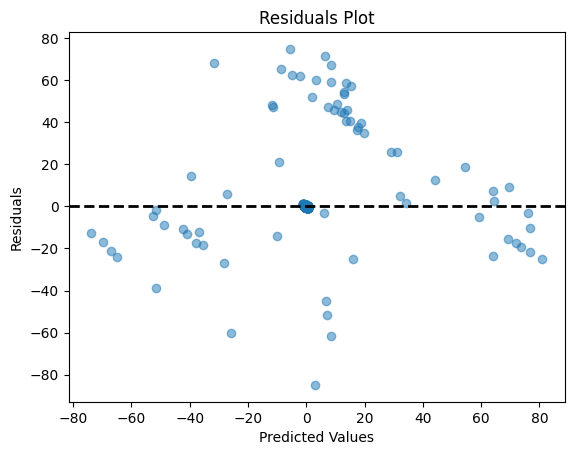

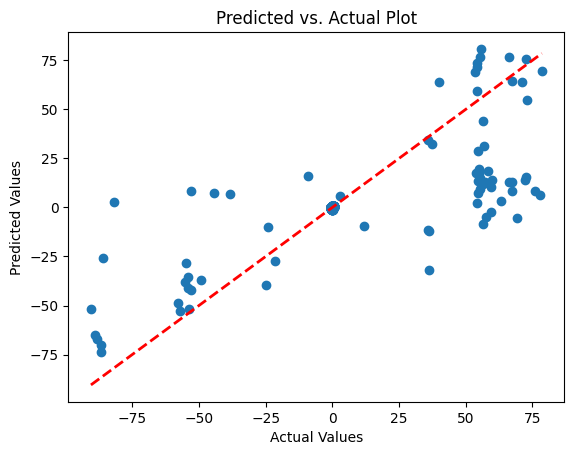

In [ ]:
# linear regression for y
perform_linear_regression(A_y, t_y)